In [1]:
# Importing the required libraries
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

## Introduction

The term "Software Development" has come to be a catch-all for many different speciliazations that deal with data, from data analysts to machine learning engineers. Often times, just looking at the title of role is not sufficient to figure out what kind of skills/comeptencies the role requires.

This project will attempt to topic model data science job listings scraped from Indeed.com into more useful categories, and then create a recomendation engine.

## Web Scraping

We have used BeautifulSoup for Web scraping

## SCRAPING CRAIGSLIST DATA

In [2]:
import pandas as pd
import urllib.request
import bs4 as bs
from bs4 import SoupStrainer
from bs4 import BeautifulSoup

In [3]:



#Cites to Scrape information from
#cities = ["San Francisco","Seattle","Chicago","Boston","Los Angeles","New York","Atlanta","Sacremento","San Diego","Denver","Phoenix","Washington DC",
         #"New Orleans","Raleigh","Cincinnati","Philadelphia","Nashville","Dallas","Houston"]

cities = ["sfbay","seattle","chicago","boston","losangeles","newyork","atlanta","sacramento","sandiego","denver","phoenix","washingtondc","neworleans","raleigh","cincinnati","philadelphia","nashville","dallas","houston"]

jobs_id = []
jobs_title = []
jobs_url = []
jobs_description = []
jobs_category = []
jobs_location = []
jobs_compensation = []
jobs_employType = []
urls = []
for city in cities:

    main_url = "https://" + city + ".craigslist.org/"
    html_main = BeautifulSoup(urllib.request.urlopen(main_url).read().decode('utf-8'), "html.parser")
    jobs = html_main.find('div', class_='jobs').find('div', class_='col')
    
    #urls = ['https://sfbay.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://seattle.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://chicago.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://boston.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://losangeles.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://newyork.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://atlanta.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://sacramento.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://sandiego.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://denver.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://phoenix.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://washingtondc.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://neworleans.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://raleigh.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://cincinnati.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://philadelphia.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://nashville.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://dallas.craigslist.org/d/software-qa-dba-etc/search/sof',
            #'https://houston.craigslist.org/d/software-qa-dba-etc/search/sof']
    categories = []
    for li in jobs.find_all('a'):
        #urls.append("https://" + city + ".craigslist.org" + li.get('href'))
        urls.append("https://" + city + ".craigslist.org/d/software-qa-dba-etc/search/sof")
        
        # Get list of all the jobs Category available in Craiglist
        categories.append(li.get_text())



In [4]:
def keep_unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [5]:
urls = keep_unique(urls)

In [6]:
print(urls)

['https://sfbay.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://seattle.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://chicago.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://boston.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://losangeles.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://newyork.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://atlanta.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://sacramento.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://sandiego.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://denver.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://phoenix.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://washingtondc.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://neworleans.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://raleigh.craigslist.org/d/software-qa-dba-etc/search/sof', 'https://cincinnati.craigslist.org/d/software-qa-d

In [7]:

    i = 1
    city_count=0
    # Extract Job from each Category
    for url in urls:
        try:
            print(url)
            html = BeautifulSoup(urllib.request.urlopen(url).read().decode('utf-8'), "html.parser")
            
            total_count = int(html.find('span', class_='totalcount').get_text())
            count = 0

            while count <= total_count:

                li_rows = html.find('ul', class_='rows').find_all('li', class_='result-row')

                for li in li_rows:
                    # Incremental Job ID
                    jobs_id.append(len(jobs_id))

                    # Append Category and Location
                    jobs_category.append('software / qa / dba')
                    jobs_location.append(cities[city_count])
                    # Get Title of The job
                    jobs_title.append(li.find('a', class_="result-title hdrlnk").get_text())
                    #print(jobs_title)
                    # Get link of the Job Posting
                    desc_url = li.find('a', class_="result-title hdrlnk").get('href')
                    jobs_url.append(desc_url)

                    desc_html = BeautifulSoup(urllib.request.urlopen(desc_url).read().decode('utf-8'), "html.parser")

                    if desc_html.find('p', class_='attrgroup'):

                        compensation_done = False
                        type_done = False

                        # Get Compensation Type and Employment Type of the Job
                        side_bar = desc_html.find('p', class_='attrgroup')
                        span_all = side_bar.find_all('span')
                        for span in span_all:
                            if span.get_text()[0:12] == 'compensation':
                                compensation_done = True
                                jobs_compensation.append(span.get_text()[14:])
                            elif span.get_text()[0:10] == 'employment':
                                type_done = True
                                jobs_employType.append(span.get_text()[16:])

                        if not compensation_done:
                            jobs_compensation.append("NOT MENTIONED")
                        if not type_done:
                            jobs_employType.append("NOT MENTIONED")

                    else:
                        jobs_compensation.append("NOT MENTIONED")
                        jobs_employType.append("NOT MENTIONED")

                    # Get Desciption of the Job
                    body = desc_html.find('section', id="postingbody").get_text()
                    body = body.replace("QR Code Link to This Post", "").replace("\n", " ").replace("\t", " ")
                    jobs_description.append(body)

                count += 120
                if count <= total_count:
                    url_sub = url + "?s=" + str(count)
                    # Go to next page of the same category
                    html = BeautifulSoup(urllib.request.urlopen(url_sub).read().decode('utf-8'), "html.parser")
            i += 1
        except:
            # For the code to continue if there is error in a page
            i += 1
            print("Problem Occured at,  " + url)
        city_count = city_count+1




https://sfbay.craigslist.org/d/software-qa-dba-etc/search/sof
https://seattle.craigslist.org/d/software-qa-dba-etc/search/sof
https://chicago.craigslist.org/d/software-qa-dba-etc/search/sof
https://boston.craigslist.org/d/software-qa-dba-etc/search/sof
Problem Occured at,  https://boston.craigslist.org/d/software-qa-dba-etc/search/sof
https://losangeles.craigslist.org/d/software-qa-dba-etc/search/sof
Problem Occured at,  https://losangeles.craigslist.org/d/software-qa-dba-etc/search/sof
https://newyork.craigslist.org/d/software-qa-dba-etc/search/sof
Problem Occured at,  https://newyork.craigslist.org/d/software-qa-dba-etc/search/sof
https://atlanta.craigslist.org/d/software-qa-dba-etc/search/sof
Problem Occured at,  https://atlanta.craigslist.org/d/software-qa-dba-etc/search/sof
https://sacramento.craigslist.org/d/software-qa-dba-etc/search/sof
Problem Occured at,  https://sacramento.craigslist.org/d/software-qa-dba-etc/search/sof
https://sandiego.craigslist.org/d/software-qa-dba-etc/s

In [8]:
#Create Pandas Dataframe of the extracted Job information
outputdf = pd.DataFrame(list(zip(jobs_id, jobs_category, jobs_location, jobs_title, jobs_compensation, jobs_employType, jobs_url, jobs_description)),
               columns =['Id', 'Category', 'Location', 'Title', 'Compensation', 'Type', 'Url', 'Description'])




In [9]:
outputdf.drop('Id', axis=1, inplace=True)

In [10]:

#Export to CSV
outputdf.to_csv('Jobs_Software.csv', index=False)

## SCRAPING INDEED DATA

In [11]:
from bs4 import BeautifulSoup
import requests
from random import random
from time import sleep
from email.message import EmailMessage
from collections import namedtuple
import smtplib
import csv


EmailCredentials = namedtuple("EmailCredentials", ['username', 'password', 'sender', 'recipient'])


def generate_url(job_title, job_location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(job_title, job_location)
    return url


def save_record_to_csv(record, filepath, create_new_file=False):
    """Save an individual record to file; set `new_file` flag to `True` to generate new file"""
    header = ["JobTitle", "Company", "Location", "Summary","Salary", "PostDate", "JobUrl"]
    if create_new_file:
        with open(filepath, mode='w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(header)
    else:
        with open(filepath, mode='a+', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            #print(record)
            writer.writerow(record)


def email_jobs_file(filepath, email):
    """This is currently setup for GMAIL. However, you may need to enable `less secure apps` for
    your email account if you want this to work. See: https://support.google.com/accounts/answer/6010255?hl=en"""
    smtp_host = 'smtp.gmail.com'
    smtp_port = 587
    with smtplib.SMTP(host=smtp_host, port=smtp_port) as server:
        server.starttls()
        server.login(email.username, email.password)
        message = EmailMessage()
        message['From'] = email.sender
        message['To'] = email.recipient
        message['Subject'] = "Updated jobs file"
        message['Body'] = "The updated Indeed postings are attached."
        message.add_attachment(open(filepath, 'r').read(), filename="indeed.csv")
        server.send_message(message)


def collect_job_cards_from_page(html):
    soup = BeautifulSoup(html, 'html.parser')
    cards = soup.find_all('div', 'jobsearch-SerpJobCard')
    return cards, soup


def sleep_for_random_interval():
    seconds = random() * 10
    sleep(seconds)


def request_jobs_from_indeed(url):
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,'
                  'application/signed-exchange;v=b3;q=0.9',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'max-age=0',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'none',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                      'Chrome/87.0.4280.67 Safari/537.36 Edg/87.0.664.47 '
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    else:
        return None


def find_next_page(soup):
    try:
        pagination = soup.find("a", {"aria-label": "Next"}).get("href")
        return "https://www.indeed.com" + pagination
    except AttributeError:
        return None


def extract_job_card_data(card):
    atag = card.h2.a
    try:
        job_title = atag.get('title')
    except AttributeError:
        job_title = ''
    try:
        company = card.find('span', 'company').text.strip()
    except AttributeError:
        company = ''
    try:
        location = card.find('div', 'recJobLoc').get('data-rc-loc')
    except AttributeError:
        location = ''
    try:
        job_summary = card.find('div', 'summary').text.strip()
        #print(job_summary)
        #sleep_for_random_interval()
    except AttributeError:
        job_summary = ''
    try:
        post_date = card.find('span', 'date').text.strip()
    except AttributeError:
        post_date = ''
    try:
        salary = card.find('span', 'salarytext').text.strip()
        #print(salary)
    except AttributeError:
        salary = ''
    job_url = 'https://www.indeed.com' + atag.get('href')
    return job_title, company, location, job_summary, salary, post_date, job_url


def main(job_title, job_location, filepath, email=None):
    unique_jobs = set()  # track job urls to avoid collecting duplicate records
    print("Starting to scrape indeed for `{}` in `{}`".format(job_title, job_location))
    url = generate_url(job_title, job_location)
    save_record_to_csv(None, filepath, create_new_file=True)

    while True:
        print(url)
        html = request_jobs_from_indeed(url)
        if not html:
            break
        cards, soup = collect_job_cards_from_page(html)
        for card in cards:
            record = extract_job_card_data(card)
            #print(record)
            if not record[-1] in unique_jobs:
                save_record_to_csv(record, filepath)
                unique_jobs.add(record[-1])
        sleep_for_random_interval()
        url = find_next_page(soup)
        if not url:
            break
    print('Finished collecting {:,d} job postings.'.format(len(unique_jobs)))
    if email:
        email_jobs_file(filepath, email)


if __name__ == '__main__':
    # job search settings
    title = 'Software Developer'
    loc = 'San Francisco'
    path = 'SD_jobs.csv'

    # include email settings if you want to email the file
    # currently setup for GMAIL... see notes above.
    email_settings = EmailCredentials(
        username='email@gmail.com',
        password='password',
        sender='from@gmail.com',
        recipient='to@gmail.com'
    )

    # using email settings
    # main(title, loc, path, email_settings)

    # without email settings
    main('Software Developer', 'San Francisco', 'SF_jobs.csv')
    main('Software Developer','Boston','BS_jobs.csv')
    main('Software Developer','Seattle','ST_jobs.csv')



Starting to scrape indeed for `Software Developer` in `San Francisco`
https://www.indeed.com/jobs?q=Software Developer&l=San Francisco
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=10
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=20
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=30
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=40
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=50
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=60
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=70
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=80
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=90
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=100
https://www.indeed.com/jobs?q=Software+Developer&l=San+Francisco&start=110
https://www.indeed.com/jobs?q=Software+Developer&

https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=450
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=460
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=470
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=480
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=490
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=500
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=510
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=520
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=530
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=540
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=550
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=560
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=570
https://www.indeed.com/jobs?q=Software+Developer&l=Boston&start=580
https://www.indeed.com/jobs?q=Software+Developer

## Cleaning and Transforming Data
The scraped data was mostly clean. The only preprocessing needed was creating a dataframe and changing a few company names.

In [12]:
##################################################################################################################
############################## Indeed.com (Train and Validate) ###################################################

# Reading an INPUT file of unique Job Postreviews from 'Indeed.com' to pre-process the data
#input = 'SD_jobs.csv'
#df = pd.read_csv(input, encoding='ISO-8859-1', engine='python') # read the file and fields

df1 = pd.read_csv("SF_jobs.csv")
df2 = pd.read_csv("BS_jobs.csv")
df3 = pd.read_csv("ST_jobs.csv")

df = pd.concat([df1,df2,df3], ignore_index=True)


In [13]:
df.info

<bound method DataFrame.info of                                                JobTitle             Company  \
0                       Software Engineer- Integrations  Cornershop by Uber   
1     Software Engineer Intern (Core Engineering) - ...           Snowflake   
2        Software Engineering Manager, Financial Crimes              Square   
3          Front End Software Engineer - React Spectrum               Adobe   
4                                    Software Developer                Arup   
...                                                 ...                 ...   
2278  Software Developer (C# .Net) - eCommerce Order...    Costco Wholesale   
2279  Software Engineer - Front End (Admin Experienc...              Splunk   
2280        Web Content Strategist and Developer Intern        Pure Storage   
2281                     Programmer Analyst II (KPWHRI)   Kaiser Permanente   
2282           Software Engineer (Leadership) - Product            Facebook   

               Loca

In [14]:

#Export to CSV
df.to_csv('Jobs_Software_Indeed.csv', index=False)
#df=df.dropna()

In [15]:
df=df.drop(df.columns[4], axis=1)
df = df.reset_index(drop=True)

df.rename(columns={ df.columns[3]: "Description" }, inplace = True)

In [16]:
df.head()

,JobTitle,Company,Location,Description,PostDate,JobUrl
0,Software Engineer- Integrations,Cornershop by Uber,"San Francisco, CA",Able to talk and reach agreements with the tec...,10 days ago,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,Software Engineer Intern (Core Engineering) - ...,Snowflake,"San Mateo, CA","Paid, full-time internships in the heart of th...",3 days ago,https://www.indeed.com/rc/clk?jk=c193a93169a0c...
2,"Software Engineering Manager, Financial Crimes",Square,"San Francisco, CA",You must enjoy writing and shipping production...,2 days ago,https://www.indeed.com/rc/clk?jk=b7f5366f7a1d7...
3,Front End Software Engineer - React Spectrum,Adobe,"San Francisco, CA",Develop and exercise your leadership abilities...,30+ days ago,https://www.indeed.com/rc/clk?jk=675cdf43dbc56...
4,Software Developer,Arup,"San Francisco, CA","You will work with development teams to build,...",4 days ago,https://www.indeed.com/rc/clk?jk=ac9e1ac3598a7...


In [17]:
df.rename(columns={ df.columns[4]: "PostDate" }, inplace = True)


In [18]:
inputFile=df

inputFile.head()

,JobTitle,Company,Location,Description,PostDate,JobUrl
0,Software Engineer- Integrations,Cornershop by Uber,"San Francisco, CA",Able to talk and reach agreements with the tec...,10 days ago,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,Software Engineer Intern (Core Engineering) - ...,Snowflake,"San Mateo, CA","Paid, full-time internships in the heart of th...",3 days ago,https://www.indeed.com/rc/clk?jk=c193a93169a0c...
2,"Software Engineering Manager, Financial Crimes",Square,"San Francisco, CA",You must enjoy writing and shipping production...,2 days ago,https://www.indeed.com/rc/clk?jk=b7f5366f7a1d7...
3,Front End Software Engineer - React Spectrum,Adobe,"San Francisco, CA",Develop and exercise your leadership abilities...,30+ days ago,https://www.indeed.com/rc/clk?jk=675cdf43dbc56...
4,Software Developer,Arup,"San Francisco, CA","You will work with development teams to build,...",4 days ago,https://www.indeed.com/rc/clk?jk=ac9e1ac3598a7...


In [19]:
record = 1
print("Title: " + inputFile.iloc[record,0]+ "\n")
print("Company: " + inputFile.iloc[record,1] + '\n')
print("City: " + (inputFile.iloc[record,2] + '\n'))
print("Job Text: " + inputFile.iloc[record,3] + '\n')

Title: Software Engineer Intern (Core Engineering) - Fall 2021

Company: Snowflake

City: San Mateo, CA

Job Text: Paid, full-time internships in the heart of the software industry.
How to build enterprise grade, reliable, and trustworthy software/services.



In [20]:
# Ascertaining the length of unique Job Post
print("The total number of unique job postings:", len(inputFile))

# Dividing the entire data set into train and test with a 70:30 ratio
inputFile_train = inputFile.iloc[:int(len(inputFile)*.70)]
print("Total number of unique Job Posts in training data set:", len(inputFile_train))

inputFile_test = inputFile.iloc[int(len(inputFile)*.70):]
print("Total number of unique Job Posts in testing data set:", len(inputFile_test))

# Initializing the object for Lemmatization, Term-Document matrix, and TF-IDF matrix
# Including bag of for uni, bi, and tri - gram words & removing English stop words
lemmatizer = nltk.stem.WordNetLemmatizer()
count_vect = CountVectorizer(ngram_range=(1,3), stop_words='english')
tfidf_vect = TfidfVectorizer(ngram_range=(1,3), stop_words='english')

# Initializing the lists for TRAINING DATA for Predictor variables - 1540 Job Post
token3_train_x = []
pos_train_x = []

# Running the loop to tokenize, lemmatize, and remove the stop words from the Job Post
for i,rows in inputFile_train.iterrows():
    print("Job Post number:", i)
    token_text = nltk.word_tokenize(str(rows['Description'].lower()))
    token_text_for_POS = nltk.word_tokenize(str(rows['Description']))
    pos_train_x.append(token_text_for_POS)
    lemmatized_text = [lemmatizer.lemmatize(token) for token in token_text if token.isalpha()]
    text_wo_stop_words = [token for token in lemmatized_text if not token in stopwords.words('english') if token.isalpha()]
    token2 = ''
    for token in text_wo_stop_words:
        token2 = token2 + ' ' + token
    token3_train_x.append(token2)

# Fitting & transforming the vector
X_train_counts = count_vect.fit_transform(token3_train_x)
print("The shape of term-document matrix for TRAINING DATA for Predictor variables:", X_train_counts.shape)

tfidf_vect.fit(token3_train_x)
X_train_tfidf = tfidf_vect.transform(token3_train_x)
print("The shape of tf-idf matrix for TRAINING DATA for Predictor variables:", X_train_tfidf.shape)

# Initializing the lists for TRAINING DATA for Response variables
token3_train_y = []
pos=[]

# Running the loop to tokenize, lemmatize, and remove the stop words from the Job Post - 1540 titles
for i,rows in inputFile_train.iterrows():
    print("Title number:", i)
    token_text = nltk.word_tokenize(rows['JobTitle'].lower())
    token_text_for_POS = nltk.word_tokenize(rows['JobTitle'])
    pos.append(token_text_for_POS)
    lemmatized_text = [lemmatizer.lemmatize(token) for token in token_text if token.isalpha()]
    text_wo_stop_words = [token for token in lemmatized_text if not token in stopwords.words('english') if token.isalpha()]
    token2 = ''
    for token in text_wo_stop_words:
        token2 = token2 + ' ' + token
    token3_train_y.append(token2)

# Fitting & transforming the vector
Y_train_counts = count_vect.fit_transform(token3_train_y)
print("The shape of term-document matrix for TRAINING DATA for Response variable:", Y_train_counts.shape)

tfidf_vect.fit(token3_train_y)
Y_train_tfidf = tfidf_vect.transform(token3_train_y)
print("The shape of tf-idf matrix for TRAINING DATA for Response variable:", Y_train_tfidf.shape)

# Initializing the lists for TESTING DATA for Predictor variables - around 661 Job Post
token3_test_x = []
pos=[]

for i,rows in inputFile_test.iterrows():
    print(" Job Post number:", i)
    token_text = nltk.word_tokenize(str(rows['Description']).lower())
    token_text_for_POS = nltk.word_tokenize(str(rows['Description']))
    pos.append(token_text_for_POS)
    lemmatized_text = [lemmatizer.lemmatize(token) for token in token_text if token.isalpha()]
    text_wo_stop_words = [token for token in lemmatized_text if not token in stopwords.words('english') if token.isalpha()]
    token2_target = ''
    for token in text_wo_stop_words:
        token2_target = token2_target + ' ' + token
    token3_test_x.append(token2_target)

# Fitting & transforming the vector
X_test_counts = count_vect.fit_transform(token3_test_x)
print("The shape of term-document matrix for TESTING DATA for Predictor variable:", X_test_counts.shape)

tfidf_vect.fit(token3_test_x)
X_test_tfidf = tfidf_vect.transform(token3_test_x)
print("The shape of tf-idf matrix for TESTING DATA for Predictor variable:", X_test_tfidf.shape)

# Initializing the lists for TESTING DATA for Response variables - around 661 titles
token3_test_y = []
pos=[]

for i,rows in inputFile_test.iterrows():
    print("Title number:", i)
    token_text = nltk.word_tokenize(rows['JobTitle'].lower())
    token_text_for_POS = nltk.word_tokenize(rows['JobTitle'])
    pos.append(token_text_for_POS)
    lemmatized_text = [lemmatizer.lemmatize(token) for token in token_text if token.isalpha()]
    text_wo_stop_words = [token for token in lemmatized_text if not token in stopwords.words('english') if token.isalpha()]
    token2_target = ''
    for token in text_wo_stop_words:
        token2_target = token2_target + ' ' + token
    token3_test_y.append(token2_target)

# Fitting & transforming the vector
Y_test_counts = count_vect.fit_transform(token3_test_y)
print("The shape of term-document matrix for TESTING DATA for Response variable:", Y_test_counts.shape)

tfidf_vect.fit(token3_test_y)
Y_test_tfidf = tfidf_vect.transform(token3_test_y)
print("The shape of term-document matrix for TESTING DATA for Response variable:", Y_test_tfidf.shape)



The total number of unique job postings: 2283
Total number of unique Job Posts in training data set: 1598
Total number of unique Job Posts in testing data set: 685
Job Post number: 0
Job Post number: 1
Job Post number: 2
Job Post number: 3
Job Post number: 4
Job Post number: 5
Job Post number: 6
Job Post number: 7
Job Post number: 8
Job Post number: 9
Job Post number: 10
Job Post number: 11
Job Post number: 12
Job Post number: 13
Job Post number: 14
Job Post number: 15
Job Post number: 16
Job Post number: 17
Job Post number: 18
Job Post number: 19
Job Post number: 20
Job Post number: 21
Job Post number: 22
Job Post number: 23
Job Post number: 24
Job Post number: 25
Job Post number: 26
Job Post number: 27
Job Post number: 28
Job Post number: 29
Job Post number: 30
Job Post number: 31
Job Post number: 32
Job Post number: 33
Job Post number: 34
Job Post number: 35
Job Post number: 36
Job Post number: 37
Job Post number: 38
Job Post number: 39
Job Post number: 40
Job Post number: 41
Job Po

Job Post number: 404
Job Post number: 405
Job Post number: 406
Job Post number: 407
Job Post number: 408
Job Post number: 409
Job Post number: 410
Job Post number: 411
Job Post number: 412
Job Post number: 413
Job Post number: 414
Job Post number: 415
Job Post number: 416
Job Post number: 417
Job Post number: 418
Job Post number: 419
Job Post number: 420
Job Post number: 421
Job Post number: 422
Job Post number: 423
Job Post number: 424
Job Post number: 425
Job Post number: 426
Job Post number: 427
Job Post number: 428
Job Post number: 429
Job Post number: 430
Job Post number: 431
Job Post number: 432
Job Post number: 433
Job Post number: 434
Job Post number: 435
Job Post number: 436
Job Post number: 437
Job Post number: 438
Job Post number: 439
Job Post number: 440
Job Post number: 441
Job Post number: 442
Job Post number: 443
Job Post number: 444
Job Post number: 445
Job Post number: 446
Job Post number: 447
Job Post number: 448
Job Post number: 449
Job Post number: 450
Job Post numb

Job Post number: 803
Job Post number: 804
Job Post number: 805
Job Post number: 806
Job Post number: 807
Job Post number: 808
Job Post number: 809
Job Post number: 810
Job Post number: 811
Job Post number: 812
Job Post number: 813
Job Post number: 814
Job Post number: 815
Job Post number: 816
Job Post number: 817
Job Post number: 818
Job Post number: 819
Job Post number: 820
Job Post number: 821
Job Post number: 822
Job Post number: 823
Job Post number: 824
Job Post number: 825
Job Post number: 826
Job Post number: 827
Job Post number: 828
Job Post number: 829
Job Post number: 830
Job Post number: 831
Job Post number: 832
Job Post number: 833
Job Post number: 834
Job Post number: 835
Job Post number: 836
Job Post number: 837
Job Post number: 838
Job Post number: 839
Job Post number: 840
Job Post number: 841
Job Post number: 842
Job Post number: 843
Job Post number: 844
Job Post number: 845
Job Post number: 846
Job Post number: 847
Job Post number: 848
Job Post number: 849
Job Post numb

Job Post number: 1208
Job Post number: 1209
Job Post number: 1210
Job Post number: 1211
Job Post number: 1212
Job Post number: 1213
Job Post number: 1214
Job Post number: 1215
Job Post number: 1216
Job Post number: 1217
Job Post number: 1218
Job Post number: 1219
Job Post number: 1220
Job Post number: 1221
Job Post number: 1222
Job Post number: 1223
Job Post number: 1224
Job Post number: 1225
Job Post number: 1226
Job Post number: 1227
Job Post number: 1228
Job Post number: 1229
Job Post number: 1230
Job Post number: 1231
Job Post number: 1232
Job Post number: 1233
Job Post number: 1234
Job Post number: 1235
Job Post number: 1236
Job Post number: 1237
Job Post number: 1238
Job Post number: 1239
Job Post number: 1240
Job Post number: 1241
Job Post number: 1242
Job Post number: 1243
Job Post number: 1244
Job Post number: 1245
Job Post number: 1246
Job Post number: 1247
Job Post number: 1248
Job Post number: 1249
Job Post number: 1250
Job Post number: 1251
Job Post number: 1252
Job Post n

The shape of term-document matrix for TRAINING DATA for Predictor variables: (1598, 27271)
The shape of tf-idf matrix for TRAINING DATA for Predictor variables: (1598, 27271)
Title number: 0
Title number: 1
Title number: 2
Title number: 3
Title number: 4
Title number: 5
Title number: 6
Title number: 7
Title number: 8
Title number: 9
Title number: 10
Title number: 11
Title number: 12
Title number: 13
Title number: 14
Title number: 15
Title number: 16
Title number: 17
Title number: 18
Title number: 19
Title number: 20
Title number: 21
Title number: 22
Title number: 23
Title number: 24
Title number: 25
Title number: 26
Title number: 27
Title number: 28
Title number: 29
Title number: 30
Title number: 31
Title number: 32
Title number: 33
Title number: 34
Title number: 35
Title number: 36
Title number: 37
Title number: 38
Title number: 39
Title number: 40
Title number: 41
Title number: 42
Title number: 43
Title number: 44
Title number: 45
Title number: 46
Title number: 47
Title number: 48
Ti

Title number: 460
Title number: 461
Title number: 462
Title number: 463
Title number: 464
Title number: 465
Title number: 466
Title number: 467
Title number: 468
Title number: 469
Title number: 470
Title number: 471
Title number: 472
Title number: 473
Title number: 474
Title number: 475
Title number: 476
Title number: 477
Title number: 478
Title number: 479
Title number: 480
Title number: 481
Title number: 482
Title number: 483
Title number: 484
Title number: 485
Title number: 486
Title number: 487
Title number: 488
Title number: 489
Title number: 490
Title number: 491
Title number: 492
Title number: 493
Title number: 494
Title number: 495
Title number: 496
Title number: 497
Title number: 498
Title number: 499
Title number: 500
Title number: 501
Title number: 502
Title number: 503
Title number: 504
Title number: 505
Title number: 506
Title number: 507
Title number: 508
Title number: 509
Title number: 510
Title number: 511
Title number: 512
Title number: 513
Title number: 514
Title numb

Title number: 947
Title number: 948
Title number: 949
Title number: 950
Title number: 951
Title number: 952
Title number: 953
Title number: 954
Title number: 955
Title number: 956
Title number: 957
Title number: 958
Title number: 959
Title number: 960
Title number: 961
Title number: 962
Title number: 963
Title number: 964
Title number: 965
Title number: 966
Title number: 967
Title number: 968
Title number: 969
Title number: 970
Title number: 971
Title number: 972
Title number: 973
Title number: 974
Title number: 975
Title number: 976
Title number: 977
Title number: 978
Title number: 979
Title number: 980
Title number: 981
Title number: 982
Title number: 983
Title number: 984
Title number: 985
Title number: 986
Title number: 987
Title number: 988
Title number: 989
Title number: 990
Title number: 991
Title number: 992
Title number: 993
Title number: 994
Title number: 995
Title number: 996
Title number: 997
Title number: 998
Title number: 999
Title number: 1000
Title number: 1001
Title nu

Title number: 1436
Title number: 1437
Title number: 1438
Title number: 1439
Title number: 1440
Title number: 1441
Title number: 1442
Title number: 1443
Title number: 1444
Title number: 1445
Title number: 1446
Title number: 1447
Title number: 1448
Title number: 1449
Title number: 1450
Title number: 1451
Title number: 1452
Title number: 1453
Title number: 1454
Title number: 1455
Title number: 1456
Title number: 1457
Title number: 1458
Title number: 1459
Title number: 1460
Title number: 1461
Title number: 1462
Title number: 1463
Title number: 1464
Title number: 1465
Title number: 1466
Title number: 1467
Title number: 1468
Title number: 1469
Title number: 1470
Title number: 1471
Title number: 1472
Title number: 1473
Title number: 1474
Title number: 1475
Title number: 1476
Title number: 1477
Title number: 1478
Title number: 1479
Title number: 1480
Title number: 1481
Title number: 1482
Title number: 1483
Title number: 1484
Title number: 1485
Title number: 1486
Title number: 1487
Title number

 Job Post number: 1831
 Job Post number: 1832
 Job Post number: 1833
 Job Post number: 1834
 Job Post number: 1835
 Job Post number: 1836
 Job Post number: 1837
 Job Post number: 1838
 Job Post number: 1839
 Job Post number: 1840
 Job Post number: 1841
 Job Post number: 1842
 Job Post number: 1843
 Job Post number: 1844
 Job Post number: 1845
 Job Post number: 1846
 Job Post number: 1847
 Job Post number: 1848
 Job Post number: 1849
 Job Post number: 1850
 Job Post number: 1851
 Job Post number: 1852
 Job Post number: 1853
 Job Post number: 1854
 Job Post number: 1855
 Job Post number: 1856
 Job Post number: 1857
 Job Post number: 1858
 Job Post number: 1859
 Job Post number: 1860
 Job Post number: 1861
 Job Post number: 1862
 Job Post number: 1863
 Job Post number: 1864
 Job Post number: 1865
 Job Post number: 1866
 Job Post number: 1867
 Job Post number: 1868
 Job Post number: 1869
 Job Post number: 1870
 Job Post number: 1871
 Job Post number: 1872
 Job Post number: 1873
 Job Post n

 Job Post number: 2200
 Job Post number: 2201
 Job Post number: 2202
 Job Post number: 2203
 Job Post number: 2204
 Job Post number: 2205
 Job Post number: 2206
 Job Post number: 2207
 Job Post number: 2208
 Job Post number: 2209
 Job Post number: 2210
 Job Post number: 2211
 Job Post number: 2212
 Job Post number: 2213
 Job Post number: 2214
 Job Post number: 2215
 Job Post number: 2216
 Job Post number: 2217
 Job Post number: 2218
 Job Post number: 2219
 Job Post number: 2220
 Job Post number: 2221
 Job Post number: 2222
 Job Post number: 2223
 Job Post number: 2224
 Job Post number: 2225
 Job Post number: 2226
 Job Post number: 2227
 Job Post number: 2228
 Job Post number: 2229
 Job Post number: 2230
 Job Post number: 2231
 Job Post number: 2232
 Job Post number: 2233
 Job Post number: 2234
 Job Post number: 2235
 Job Post number: 2236
 Job Post number: 2237
 Job Post number: 2238
 Job Post number: 2239
 Job Post number: 2240
 Job Post number: 2241
 Job Post number: 2242
 Job Post n

Title number: 1975
Title number: 1976
Title number: 1977
Title number: 1978
Title number: 1979
Title number: 1980
Title number: 1981
Title number: 1982
Title number: 1983
Title number: 1984
Title number: 1985
Title number: 1986
Title number: 1987
Title number: 1988
Title number: 1989
Title number: 1990
Title number: 1991
Title number: 1992
Title number: 1993
Title number: 1994
Title number: 1995
Title number: 1996
Title number: 1997
Title number: 1998
Title number: 1999
Title number: 2000
Title number: 2001
Title number: 2002
Title number: 2003
Title number: 2004
Title number: 2005
Title number: 2006
Title number: 2007
Title number: 2008
Title number: 2009
Title number: 2010
Title number: 2011
Title number: 2012
Title number: 2013
Title number: 2014
Title number: 2015
Title number: 2016
Title number: 2017
Title number: 2018
Title number: 2019
Title number: 2020
Title number: 2021
Title number: 2022
Title number: 2023
Title number: 2024
Title number: 2025
Title number: 2026
Title number

In [21]:
from xgboost import XGBClassifier

In [22]:
##################################################################################################################
############################## Indeed.com (Model Training) #######################################################


 
# Logistic Regression Model
text_clf_logit = Pipeline([('vect1', CountVectorizer()), ('tfidf1', TfidfTransformer()), ('clf-lr', LogisticRegression(penalty='l2', random_state=42)),])
model_logit = text_clf_logit.fit(token3_train_x, token3_train_y)
predicted_logit = text_clf_logit.predict(token3_test_x)
print("The prediction accuracy for Logistic Regression is:", np.mean(predicted_logit == token3_test_y)*100, "%")

# Support Vector Machine (SVM)
text_clf_svm = Pipeline([('vect3', CountVectorizer()), ('tfidf3', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=15, random_state=22)),])
model_svm = text_clf_svm.fit(token3_train_x, token3_train_y)
predicted_svm = text_clf_svm.predict(token3_test_x)
print("The prediction accuracy for Support Vector Machine is:", np.mean(predicted_svm == token3_test_y)*100, "%")

# XGBoost (xgb)
text_clf_xgb = Pipeline([('vect3', CountVectorizer()), ('tfidf3', TfidfTransformer()), 
                         ('clf-xgb', XGBClassifier( learning_rate =0.05, n_estimators=140, max_depth=10000,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), ),])
model_xgb = text_clf_xgb.fit(token3_train_x, token3_train_y)
predicted_xgb = text_clf_xgb.predict(token3_test_x)
print("The prediction accuracy for XGBOOST is:", np.mean(predicted_xgb == token3_test_y)*100, "%")



# Random Forest
text_clf_rf = Pipeline([('vect2', CountVectorizer()), ('tfidf2', TfidfTransformer()), ('clf-rf', RandomForestClassifier(n_estimators = 250, random_state=42)),])
model_rf = text_clf_rf.fit(token3_train_x, token3_train_y)
predicted_rf = text_clf_rf.predict(token3_test_x)
print("The prediction accuracy for Random Forest is:", np.mean(predicted_rf == token3_test_y)*100, "%")



# Storing the results of SVM Model
pred_rf = pd.DataFrame(predicted_rf)
pred_rf['actual'] = pd.DataFrame(token3_test_y)

The prediction accuracy for Logistic Regression is: 4.087591240875913 %


/Users/mayankjha/Documents/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


The prediction accuracy for Support Vector Machine is: 9.48905109489051 %
[22:45:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The prediction accuracy for XGBOOST is: 4.37956204379562 %
The prediction accuracy for Random Forest is: 10.656934306569344 %


In [23]:
##################################################################################################################
############################## Craigslist.com (Test) #############################################################

# Reading a TEST file of Job Post to pre-process the data
output = 'Jobs_Software.csv'
outputFile = pd.read_csv(output, encoding='ISO-8859-1', engine='python')   # read the file and fields
print("\nTotal number of unique Job Post in testing data set of Craigslist:", len(outputFile))

# Pre-processing the TEST file data for both columns of title and description
desc = list(outputFile['Description'])
desc_modified=[]
for i in range(0, len(desc)):
    desc_modified.append(desc[i].strip())

title = list(outputFile['Title'])
title_modified=[]
for i in range(0, len(title)):
    title_modified.append(title[i].strip())

# PREDICTING the results from the SVM Model to the test set of Craigslist title
predicted_cs_rf = text_clf_rf.predict(desc_modified)

# Storing the results of SVM Model
pred_cs = pd.DataFrame(predicted_cs_rf)
pred_cs['actual_cs'] = pd.DataFrame(title_modified)

# Writing the csv file consisting of both actual and predicted values of job titles
pred_cs.to_csv('pred_job_categories.csv')

##################################################################################################################


Total number of unique Job Post in testing data set of Craigslist: 582


In [24]:
outputFile.head()

,Category,Location,Title,Compensation,Type,Url,Description
0,software / qa / dba,sfbay,"Software Engineer, Vocabulary.com",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,Millions of people a month use Vocabulary...
1,software / qa / dba,sfbay,"Software Engineer, IXL Product",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
2,software / qa / dba,sfbay,"Software Engineer - Full-Stack, IXL Business P...",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
3,software / qa / dba,sfbay,"Software Engineer, Core Technology",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
4,software / qa / dba,sfbay,Mobile Engineering Manager,Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/hayward...,"IXL Learning, a leading edtech company wi..."


In [25]:
df2=pd.read_csv('pred_job_categories.csv')

In [26]:
df2.head()

,Unnamed: 0,0,actual_cs
0,0,software engineer,"Software Engineer, Vocabulary.com"
1,1,software engineer,"Software Engineer, IXL Product"
2,2,software engineer,"Software Engineer - Full-Stack, IXL Business P..."
3,3,software engineer,"Software Engineer, Core Technology"
4,4,software engineer,Mobile Engineering Manager


In [27]:
df2=df2.drop(df2.columns[0], axis=1)
df2 = df2.reset_index(drop=True)

In [28]:
df2.head()

,0,actual_cs
0,software engineer,"Software Engineer, Vocabulary.com"
1,software engineer,"Software Engineer, IXL Product"
2,software engineer,"Software Engineer - Full-Stack, IXL Business P..."
3,software engineer,"Software Engineer, Core Technology"
4,software engineer,Mobile Engineering Manager


In [29]:
df2[df2.columns[0]].unique()

array([' software engineer', ' developer', ' senior software engineer',
       ' machine learning engineer', ' software development engineer ii',
       ' software engineer full stack',
       ' senior flutter developer remote', ' mechatronics intern',
       ' software engineer reinforcement learning',
       ' full stack developer', ' web developer', ' java developer',
       ' full stack engineer', ' io developer', ' devops engineer',
       ' lead software engineer', ' senior software developer team lead',
       ' software engineer ii', ' senior game developer remote',
       ' android developer kotlin rxjava', ' front end web developer',
       ' software qa engineer', ' software developer engineer test',
       ' software integration',
       ' software engineer audio signal processing augmented reality',
       ' embedded firmware software engineer', ' aws lambda developer',
       ' software qa engineer real time payment visa digital developer platform ddp',
       ' developer

In [30]:
df2.rename(columns={ df2.columns[0]: "Title" }, inplace = True)

In [31]:
df2.head()

,Title,actual_cs
0,software engineer,"Software Engineer, Vocabulary.com"
1,software engineer,"Software Engineer, IXL Product"
2,software engineer,"Software Engineer - Full-Stack, IXL Business P..."
3,software engineer,"Software Engineer, Core Technology"
4,software engineer,Mobile Engineering Manager


In [32]:
df3=df2['Title']

In [33]:
df3.head()

0     software engineer
1     software engineer
2     software engineer
3     software engineer
4     software engineer
Name: Title, dtype: object

In [34]:
outputFile['Category']=df3
outputFile.rename(columns={ outputFile.columns[0]: "Role" }, inplace = True)

In [35]:
outputFile.head()

,Role,Location,Title,Compensation,Type,Url,Description
0,software engineer,sfbay,"Software Engineer, Vocabulary.com",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,Millions of people a month use Vocabulary...
1,software engineer,sfbay,"Software Engineer, IXL Product",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
2,software engineer,sfbay,"Software Engineer - Full-Stack, IXL Business P...",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
3,software engineer,sfbay,"Software Engineer, Core Technology",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
4,software engineer,sfbay,Mobile Engineering Manager,Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/hayward...,"IXL Learning, a leading edtech company wi..."


In [36]:
df=outputFile

In [37]:
df.head()

,Role,Location,Title,Compensation,Type,Url,Description
0,software engineer,sfbay,"Software Engineer, Vocabulary.com",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,Millions of people a month use Vocabulary...
1,software engineer,sfbay,"Software Engineer, IXL Product",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
2,software engineer,sfbay,"Software Engineer - Full-Stack, IXL Business P...",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
3,software engineer,sfbay,"Software Engineer, Core Technology",Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/san-mat...,"IXL Learning, a leading edtech company wi..."
4,software engineer,sfbay,Mobile Engineering Manager,Competitive salary and benefits,full-time,https://sfbay.craigslist.org/pen/sof/d/hayward...,"IXL Learning, a leading edtech company wi..."


In [38]:
job_posts = list(df['Description'].dropna())

In [39]:
print(len(job_posts))

582


In [40]:
# tokenize job_posts
tokens = [nltk.word_tokenize(i) for i in job_posts]

# set lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# initialize empty list to store final tokens
finals = []
for x in tokens:
    # lemmatize words using 'verb' pos tag (determines the lemmas)
    new = [lemmatizer.lemmatize(token, pos="v") for token in x if token.isalpha()]
    # remove stop words
    new = [token for token in new if not token in stopwords.words('english')]
    # append each job_posts to finals list
    finals.append(new)

# merge each element in each sublist into one sentence
end = []
for x in finals:
    y = [' '.join(x)]
    end.append(y)

import itertools

# consolidate all job_posts together into one list with over 2000 elements (one per job_posts)
final = list(itertools.chain.from_iterable(end))

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time, os
import pickle
from collections import Counter
import re
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from src.features.nlp_utilities import load_clean_nlp, spacy_tagging_demo, new_stop_words
from src.features.nlp_utilities import text_process,display_topics,count_vectorizer_display, tfidf_vectorizer_display
from src.features.nlp_utilities import tsne_viz, pca_viz



The original text was whittled down to only the important words and skills

## Topic Modeling

Once we have our fully processed text, it's time to move to topic modeling by:

1. Employing a TFIDF Vectorizer to count word occurences and produce a bag-of-words matrix. We chose TFIDF Vectorizer over the traditional Count Vectorizer because it gave us more meaningful topics 


2. Feeding the transformed "document word matrix" into a Non-Negative Matrix Factorization Model (NMF) to produce our topics

In [54]:
tfidf_doc_topic = tfidf_vectorizer_display(final,topics=6,max_features=100,max_o = 0.9,min_o = 150)


Topic  0
experience, work, project, team, development, software, design, use, skills, develop

Topic  1
want, company, job, need, career, mission, hire, students, work, program

Topic  2
look, include, engineer, software, applications, web, apply, test, company, application

Topic  3
career, train, help, job, technology, program, join, new, industry, design

Topic  4
role, https, position, apply, require, engineer, work, data, technology, team

Topic  5
interview, software, engineer, job, experience, skills, competitive, include, company, computer


Classifying and naming topics is more of an art than science, however I think there are defintely clear divisions in the above topics:

* Topic 0: Experienced Software Developer
* Topic 1: Intern Software Developer
* Topic 2: Software Testing Engineer
* Topic 3: Application/Software Developer
* Topic 4: Data Engineer
* Topic 5: Entry Level Software Engineer

In [55]:
topic_df = pd.DataFrame(tfidf_doc_topic.round(2),
                 index = (zip(df.index.values,df.Role)),
                columns = ['Experienced Software Developer','Intern Software Developer','Software Testing Engineer','Application/Software Developer','Data Engineer','Entry Level Software Engineer'])

topic_df['Topic'] = topic_df.idxmax(axis=1)
topic_df

,Experienced Software Developer,Intern Software Developer,Software Testing Engineer,Application/Software Developer,Data Engineer,Entry Level Software Engineer,Topic
"(0, software engineer)",0.18,0.06,0.00,0.03,0.00,0.00,Experienced Software Developer
"(1, software engineer)",0.16,0.07,0.05,0.01,0.00,0.00,Experienced Software Developer
"(2, software engineer)",0.18,0.07,0.04,0.01,0.00,0.00,Experienced Software Developer
"(3, software engineer)",0.18,0.02,0.05,0.03,0.01,0.00,Experienced Software Developer
"(4, software engineer)",0.20,0.04,0.06,0.00,0.00,0.00,Experienced Software Developer
...,...,...,...,...,...,...,...
"(577, developer)",0.00,0.35,0.00,0.00,0.00,0.03,Intern Software Developer
"(578, software engineer)",0.00,0.00,0.00,0.39,0.00,0.00,Application/Software Developer
"(579, software engineer)",0.00,0.00,0.02,0.35,0.03,0.00,Application/Software Developer
"(580, software engineer)",0.13,0.00,0.14,0.01,0.03,0.00,Software Testing Engineer


Appending the "Topic" with the highest weight to each job listings in our original dataframe, we can now see the job titles and topics together

## Topic Visualization

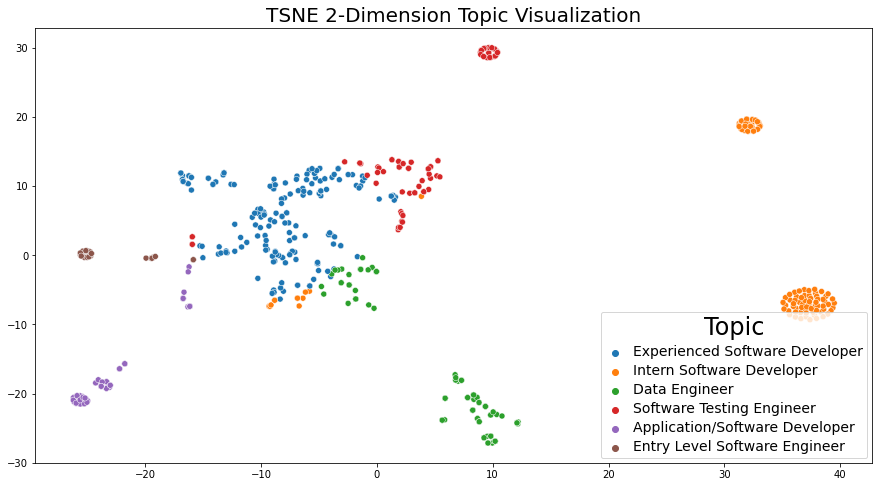

In [56]:
tsne_viz(tfidf_doc_topic,topic_df)

Using TSNE to reduce the document word matrix to two-dimensions, we see clear divisions between the different topics

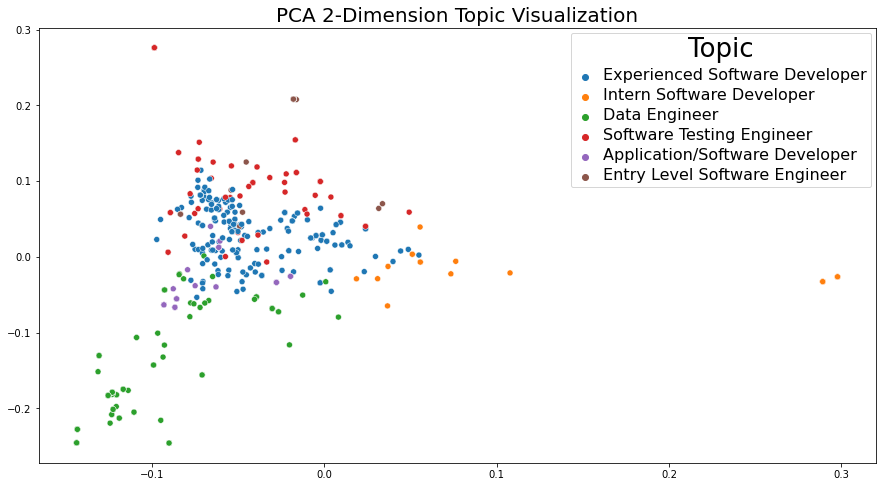

In [57]:
pca_viz(tfidf_doc_topic,topic_df)

Dimensionality reduction using PCA shows more overlap

## Topic Breakdows

Text(0.5, 1.0, 'Software Enginnering Jobs Across various Cities For Craigslist')

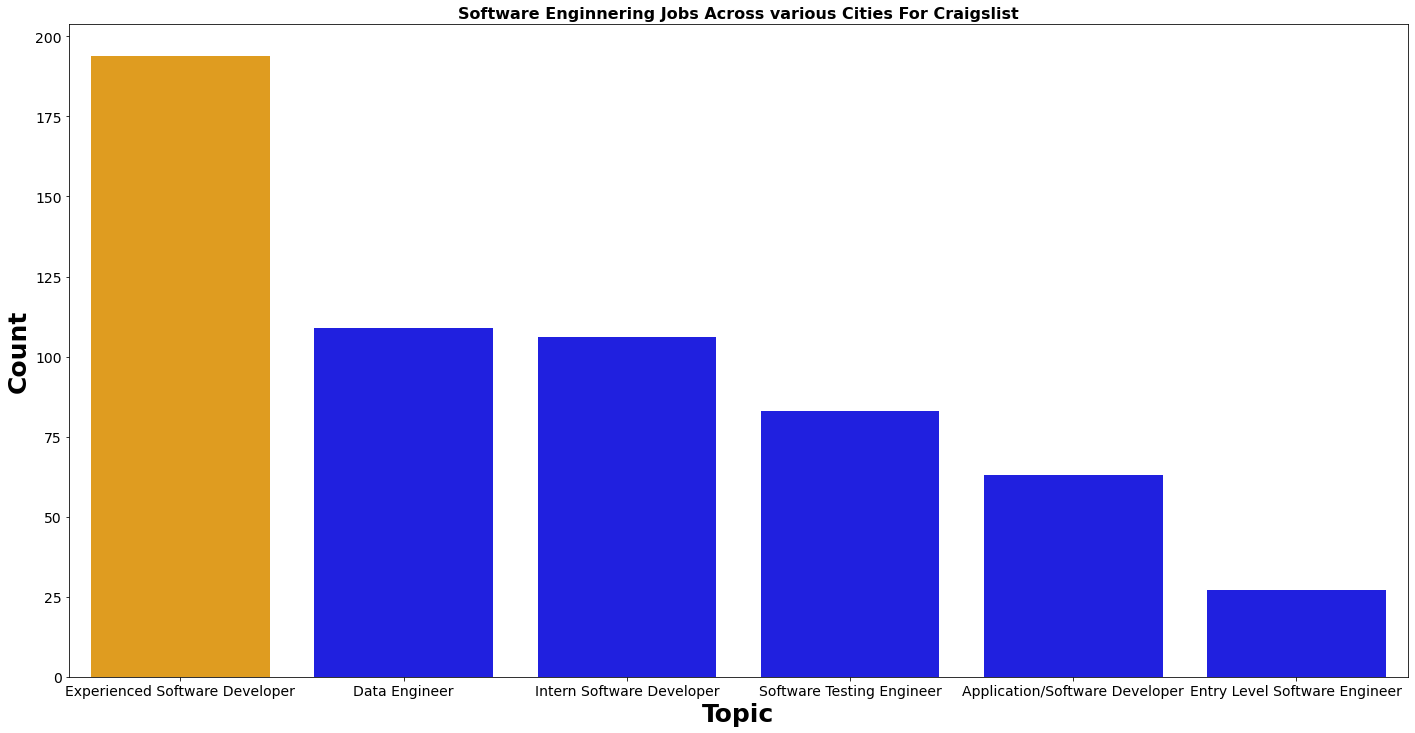

In [58]:
plt.figure(figsize=[24,12])
ax = sns.countplot(x="Topic", data=topic_df,order=topic_df.Topic.value_counts().index, palette=['orange','blue','blue','blue','blue','blue'])
plt.ylabel('Count',fontsize=25,fontweight='bold')
plt.xlabel("Topic",fontsize=25,fontweight='bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title ('Software Enginnering Jobs Across various Cities For Craigslist',fontsize=16,fontweight='bold')

The most prevalent type of role across all cities is "Experienced Software Developer"

## Job Recommender based on Job Postings

Now that we have our topics, we can create recommendations using the original TFIDF document word matrix and cosine distance.

In [59]:
def get_job_recommendation(itemID, VT,df, num_recom=3):
    recs = []
    for item in range(VT.shape[0]):
        if item != itemID:
            recs.append([item,np.dot(VT[itemID],VT[item])])
    final_rec = [i[0] for i in sorted(recs,key=lambda x: x[1],reverse=True)]

    print("You selected : " + df.iloc[itemID,0] + " at " + df.iloc[itemID,2] + " in " +df.iloc[itemID,1] + '\n'
           + '\n'+"You would also like: " + '\n')
    for i in final_rec[:num_recom]:
        print(df.iloc[i,0]+ " at " + df.iloc[i,2] +" in " +df.iloc[i,1] + " with job link --> "+df.iloc[i,5]+ '\n')



In [60]:
get_job_recommendation(100,tfidf_doc_topic,df,num_recom=3)

You selected :  software engineer at Software Engineer in sfbay

You would also like: 

 software engineer at Senior Software Engineer, IXL Content in raleigh with job link --> https://raleigh.craigslist.org/sof/d/cary-senior-software-engineer-ixl/7315091789.html

 software engineer at Senior Software Engineer, IXL Content in raleigh with job link --> https://raleigh.craigslist.org/sof/d/cary-senior-software-engineer-ixl/7300469730.html

 software engineer at Build/Release & Test Environment Engineer in sfbay with job link --> https://sfbay.craigslist.org/pen/sof/d/san-mateo-build-release-test/7315079819.html



## Job Recommender based on Resume Upload

Now that we have our topics, we can create recommendations using the original TFIDF document word matrix and cosine distance.

In [61]:
from PyPDF2 import PdfFileReader
import PyPDF2
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
stopwords = spacy.lang.en.STOP_WORDS
import string
import gensim

## Document Keyword Extraction
We Scan candidate resume and find similarity match with job requisitions by extracting and comparing keywords.The candidate needs to upload the file and we check whether, it consists of code which reads a candidate resume and checks whether it is a pdf or a docx.

We Extract keywords from resume and matches it with the job description and skills in the csv file.



In [63]:
#DOC Extraction
filtered_sentence=[]
import docx
filename="Mayank_resume.pdf"
if filename[-4:]=="docx":
    print(filename[-4:])
    def getText(filename):
        doc = docx.Document(filename)
        fullText = []
        for para in doc.paragraphs:
            fullText.append(para.text)
        return '\t'.join(fullText)
    text=getText(filename)
else:
    print(filename[-4:])
    def pdfextract(file):
        fileReader = PyPDF2.PdfFileReader(open(filename,'rb'))
        countpage = fileReader.getNumPages()
        count = 0
        text = []
        while count < countpage:    
            pageObj = fileReader.getPage(count)
            count +=1
            t = pageObj.extractText()
            print("////////////////////////////////////////////")
            #print (t)
            text.append(t)
        return text
    text = pdfextract(filename)
    #print(textdoc)
text = str(text)
text = text.replace("\\n", "")
text = text.lower()
textdoc=nlp(text)
fstring=[token.text for token in textdoc if not token.text.isspace()]
fstring = [''.join(c for c in s if c not in string.punctuation) for s in fstring]
fstring = [s for s in fstring if s]
for word in fstring:
    #print(word)
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(filtered_sentence)

##########################################################################

#####################################################################################
#Reading job description csv
import pandas as pd
df=pd.read_csv("Reqs.csv", encoding = "ISO-8859-1")
df.fillna(0)
df['mix']=df['Job Description'].astype(str) + df['Skills'].astype(str)
#df['mix']=df['Job Description'].astype(str) 


#df['newc'] = df['Job Description'].str.cat(df.State_code)
nlist=[]
finaljoblist=[]
for i in df['mix']:
    nlist.append(i)
for i in nlist:
    i=str(i)
    i=i.replace("\\n", "")
    i = i.lower()
    textdoc=nlp(i)
    jstring=[token.text for token in textdoc if not token.text.isspace()]
    jstring = [''.join(c for c in s if c not in string.punctuation) for s in jstring]
    jstring = [s for s in jstring if s]
    #print(jstring)
    finaljoblist.append(jstring)
#print(finaljoblist[0])
nfinal1=[]
nfinal2=[]
for l in range(0,len(finaljoblist)):
    nfinal1=[]
    for j in finaljoblist[l]:
        lexeme = nlp.vocab[j]
        if lexeme.is_stop == False:
            nfinal1.append(j)
    nfinal2.append(nfinal1)
#print(nfinal2[0])
#print(nfinal[10])


#tfidf_vectorizer = TfidfVectorizer()
tfidflistm={}
i=0

#print(filtered_sentence)
#print(nfinal2[9])
gen_docs=nfinal2

.pdf
////////////////////////////////////////////
['mayankjhaemail', 'jha26purdueeduhttpsmayankjha', 'purduegithubio', 'mobile1', '765', '418', '2291experiencedapplicationdeveloperwithademonstratedhistoryofworkingintheservicesandsoftwaredevelopmentindustryskilledinjava8springboot', 'hibernateandalgorithms', 'lookingforjobopportunitiesasasoftwaredeveloper', 'datascientisteducation‹purdueuniversitywestlafayette', 'indianamasterofbusinessanalyticandinformationmanagementjan2021present‹birlainstituteoftechnologyandsciencepilani', 'indiabachelorofinformationsystemsjuly2011may2015professionalexperience‹goscalebengaluru', 'indiaseniorsoftwareengineerseniorback', 'enddevelopermay2020', 'dec2020java', 'spring', 'implementedtheback', 'endbusinesslayersleveragingspring', 'webservicesandjavaeecomponentsoperatingspringmvcandspringiocamazonelasticsearchservice', 'managedopensourceelasticsearchapis', 'managedkibana', 'integrationwithlogstashandotherawsservices', 'andbuilt', 'inalertingandsqlqueryingfo

We provide you with the similarity match % with each and every job req for each resume!

We have used the Gensim library for this which makes comparing dictionaries easier.

The code counts each unique keywords and gives it a unique integer.



In [64]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

{'ability': 0, 'able': 1, 'according': 2, 'accountability': 3, 'accounting': 4, 'accounts': 5, 'accruals': 6, 'accuracy': 7, 'action': 8, 'adjustments': 9, 'advanced': 10, 'analysis': 11, 'analytical': 12, 'analyze': 13, 'anticipates': 14, 'applicable': 15, 'areas': 16, 'assets': 17, 'assigns': 18, 'assists': 19, 'attention': 20, 'audits': 21, 'autonomous': 22, 'awareness': 23, 'basis': 24, 'big': 25, 'business': 26, 'changes': 27, 'collaborate': 28, 'collaborates': 29, 'combination': 30, 'commitments': 31, 'communicate': 32, 'complete': 33, 'complex': 34, 'comprehend': 35, 'consequences': 36, 'consolidated': 37, 'contact': 38, 'coordinates': 39, 'corporate': 40, 'cpa': 41, 'critical': 42, 'current': 43, 'daily': 44, 'data': 45, 'deadline': 46, 'decisions': 47, 'demonstrate': 48, 'department': 49, 'departmental': 50, 'detail': 51, 'development': 52, 'directed': 53, 'disciplinary': 54, 'discipline': 55, 'disparities': 56, 'employee': 57, 'employees': 58, 'ensuring': 59, 'enterprise': 60

In [65]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
print(corpus)

[[(0, 2), (1, 3), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 2), (61, 2), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 3), (72, 3), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 2), (99, 1), (100, 2), (101, 1), (102, 1), (103, 2), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [66]:
import numpy as np
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['ability', 0.02], ['able', 0.05], ['according', 0.07], ['accountability', 0.07], ['accounting', 0.15], ['accounts', 0.07], ['accruals', 0.07], ['accuracy', 0.02], ['action', 0.09], ['adjustments', 0.09], ['advanced', 0.04], ['analysis', 0.04], ['analytical', 0.07], ['analyze', 0.06], ['anticipates', 0.09], ['applicable', 0.05], ['areas', 0.12], ['assets', 0.07], ['assigns', 0.05], ['assists', 0.04], ['attention', 0.03], ['audits', 0.05], ['autonomous', 0.09], ['awareness', 0.05], ['basis', 0.05], ['big', 0.04], ['business', 0.05], ['changes', 0.05], ['collaborate', 0.09], ['collaborates', 0.03], ['combination', 0.09], ['commitments', 0.09], ['communicate', 0.04], ['complete', 0.03], ['complex', 0.05], ['comprehend', 0.09], ['consequences', 0.09], ['consolidated', 0.12], ['contact', 0.09], ['coordinates', 0.18], ['corporate', 0.09], ['cpa', 0.04], ['critical', 0.05], ['current', 0.02], ['daily', 0.05], ['data', 0.05], ['deadline', 0.09], ['decisions', 0.05], ['demonstrate', 0.02], ['d

In [67]:
sims = gensim.similarities.Similarity('Job Suggestions',tf_idf[corpus], num_features=len(dictionary))

In [68]:
#print("Number of documents:",len(filtered_sentence))  

# query_doc = [[w.lower() for w in word_tokenize(m)] for m in file2_docs]
# query_doc_bow = dictionary.doc2bow(query_doc)
import operator
query_doc = filtered_sentence
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc) 
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
#print(query_doc_tf_idf)
rs='Comparing Result:', sims[query_doc_tf_idf]
#print(rs)
jobsim=[]
jobtit=[]
jobsugdict={}
jobsugdict.clear()
for i in range(0,len(rs[1])):
    jobsim.append(rs[1][i])
    jobtit.append(df['Job Posting Title'][i])
    #print(df['Job Posting Title'][i], 'has similarity of: ',rs[1][i])
    jobsugdict[df['Job Posting Title'][i]]=rs[1][i]
#print(jobsugdict)    



['mayankjhaemail', 'jha26purdueeduhttpsmayankjha', 'purduegithubio', 'mobile1', '765', '418', '2291experiencedapplicationdeveloperwithademonstratedhistoryofworkingintheservicesandsoftwaredevelopmentindustryskilledinjava8springboot', 'hibernateandalgorithms', 'lookingforjobopportunitiesasasoftwaredeveloper', 'datascientisteducation‹purdueuniversitywestlafayette', 'indianamasterofbusinessanalyticandinformationmanagementjan2021present‹birlainstituteoftechnologyandsciencepilani', 'indiabachelorofinformationsystemsjuly2011may2015professionalexperience‹goscalebengaluru', 'indiaseniorsoftwareengineerseniorback', 'enddevelopermay2020', 'dec2020java', 'spring', 'implementedtheback', 'endbusinesslayersleveragingspring', 'webservicesandjavaeecomponentsoperatingspringmvcandspringiocamazonelasticsearchservice', 'managedopensourceelasticsearchapis', 'managedkibana', 'integrationwithlogstashandotherawsservices', 'andbuilt', 'inalertingandsqlqueryingforgettingdatafordashboard‹citipune', 'indiaseniorso

It counts the frquency of the word in all the requsitions and the resume.

The integer then becomes the key part of the dictionary and the frequency becomes the value part.

Running the code will give us a result of top 5 matched jobs with the resume that candidate has uploaded. It will provide us with a % match of keywords!

This code can be used for anything where you need a percentage match based on comparing keyowrds of one file to the other.

## FINALLY, THE JOB RECOMMENDATION!!

In [69]:
sorted_d = dict( sorted(jobsugdict.items(), key=operator.itemgetter(1),reverse=True))
print(" Top 5 Jobs suggested for your resume are:")
c=0
for i in sorted_d:
    c+=1
    #print("\n",c,".",i,", Similarity :",jobsugdict[i])
    print("\n {} . {} Similarity : {}".format(c,i,jobsugdict[i]))
    if c==5:
        break

 Top 5 Jobs suggested for your resume are:

 1 . Business Intelligence (BI) Analyst | HS Finance Similarity : 0.07929764688014984

 2 . Business Intelligence (BI) Analyst | Enterprise Data & Analytics | Multi-City Similarity : 0.07929764688014984

 3 . Business Intelligence Analyst | EDA Financial/HR | Multi-City Similarity : 0.07929764688014984

 4 . HR Technology Administrator (HRIS) | HR Operations Similarity : 0.0535132959485054

 5 . Manager, Accounting | Corporate Accounting Similarity : 0.0
